### 1. Listen versus Arrays

In Listen kann man verschiedene Typen der Elemente verwenden:

In [1]:
l = ['today', 3, .9, 'yes']
l

['today', 3, 0.9, 'yes']

In Arrays ist nur ein Datentyp der Elemente erlaubt:

In [44]:
import numpy as np
import matplotlib.pyplot as plt

a = np.array(['today', 3, .9, 'yes'])
a

array(['today', '3', '0.9', 'yes'], dtype='<U32')

In [3]:
type(a[1])

numpy.str_

Alle Elemente des Arrays werden zu String umgeformt. In Python werden die Objekte betrachten und hieraus der Datentype bestimmt. Zuerst wird bestimmt ob es eine Liste oder ein Array ist.

Bei einer Liste, muss der Datentyp eines jeden einzelnen Elements bestimmt werden. Beim Array wird dies nur einmal getan. **Daher ist das Arbeiten mit einem Array schneller.**

Versuchen wir eine Liste und Array zu kreieren, die mehr Elemente beinhalten:

In [4]:
l_long = [x for x in range(1, 100000)]
a_long = np.array([x for x in range(1, 100000)])

In [12]:
l_rand = [x for x in np.random.randint(1, 100, size = 1000000)]
a_rand = np.array([x for x in np.random.randint(1, 100, size = 1000000)])

In [13]:
def just_for_fun(li):
    
    coll = []
    
    for i in li:
        
        if i % 2:
            coll.append(np.sin(i))
            
        else:
            coll.append(np.cos(i))  
            
    for i in li:
        x = 'hallo'
    
    #plt.figure(figsize = (20, 5))
    #plt.scatter(li[:300], coll[:300], alpha = 0.5, color = 'purple', s = 50)
                

In [14]:
just_for_fun(l_long)

In [15]:
just_for_fun(a_long)

In [16]:
# use of %timeit for measuring the time
%timeit just_for_fun(l_long)

102 ms ± 355 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
%timeit just_for_fun(a_long)

165 ms ± 3.99 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
# use of %timeit for measuring the time
%timeit just_for_fun(l_rand)

1.54 s ± 26.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
%timeit just_for_fun(a_rand)

1.64 s ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


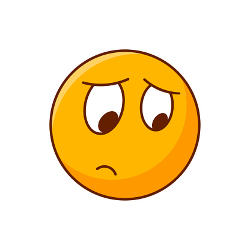

...funktioniert gerade nicht!

## 2. UFuncs

In unserem Buch ist weiter von den universelle Funktionen, kurz uFunkcs, zu lesen. Probieren wir diese mal aus, ob diese schneller funktionieren.

In [22]:
%timeit x_long = [np.sin(x) if x % 2 == 0 else np.cos(x) for x in l_long]


102 ms ± 11.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
%timeit x_long = [np.sin(x) if x % 2 == 0 else np.cos(x) for x in a_long]

166 ms ± 1.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
%timeit x_long = [np.sin(x) if x % 2 == 0 else np.cos(x) for x in l_rand]

1.62 s ± 25.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
%timeit x_long = [np.sin(x) if x % 2 == 0 else np.cos(x) for x in l_rand]

1.6 s ± 14.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
def jff(li):
    coll = []
    for i in li:
        coll.append(i/33)
        

In [32]:
# function with for loop
%timeit jff(a_long)

22.7 ms ± 307 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
# vectorized operation
%timeit a_long / 33

125 µs ± 837 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [40]:
# uFunc np.divide()
%timeit np.divide(a_long, 33)

127 µs ± 953 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [41]:
# function with for loop
%timeit jff(a_rand)

235 ms ± 8.77 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [42]:
# vectorized operation
%timeit a_rand / 33

1.89 ms ± 164 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [43]:
# uFunc np.divide()
%timeit np.divide(a_rand, 33)

1.93 ms ± 88.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Hier sieht man einen deutlichen Unterschied von for-Schleife zu einer vectorisierten Operation und uFunc.

Mit Listen kann man nur die for-Schleife durchführen. 

In [36]:
# function with for loop
%timeit jff(l_long)

7.33 ms ± 124 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [37]:
# function with for loop
%timeit jff(l_long)

7.44 ms ± 91.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Weitere Funktionen

**Operationen**

    np.add() - Addition
    np.subtract() - Subtraction
    np.negative() - Negation
    np.muliply() - Muliplikation
    np.divide() - Division
    np.floor_divide() - Ganzzahldivision
    np.power() - Potenzierung
    np.mod() - Modulo
    
**Log und e Funktionen**

    np.log() - ln
    np.log2() - log2
    np.log10() - log10
    np.expm1() - e Funktion
    

    
    


...und vieles mehr! Studiere hierzu gern das Buch oder suche im Netz!
    